In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
df=pd.read_csv('/content/ADANIGREEN_with_indicators_.csv')
df.head()

,date,open,high,low,close,volume,sma5,sma10,sma15,sma20,...,fastd,fastksr,fastdsr,ULTOSC,WILLR,ATR,Trange,TYPPRICE,HT_DCPERIOD,BETA
0,2018-06-18 14:55:00+05:30,31.5,31.5,31.5,31.5,670,31.5,31.5,31.5,31.5,...,0.0,0.0,0.000000,8.000000,0.0,0.174037,0.0,31.5,18.265136,0.0
1,2018-06-18 15:00:00+05:30,31.5,31.5,31.5,31.5,137,31.5,31.5,31.5,31.5,...,0.0,100.0,33.333333,7.619048,0.0,0.161605,0.0,31.5,18.279202,0.0
2,2018-06-18 15:05:00+05:30,31.5,31.5,31.5,31.5,660,31.5,31.5,31.5,31.5,...,0.0,100.0,66.666667,8.067227,0.0,0.150062,0.0,31.5,18.317547,0.0
3,2018-06-18 15:10:00+05:30,31.5,31.5,31.5,31.5,351,31.5,31.5,31.5,31.5,...,0.0,0.0,66.666667,7.142857,0.0,0.139343,0.0,31.5,18.371627,0.0
4,2018-06-18 15:15:00+05:30,31.5,31.5,31.5,31.5,643,31.5,31.5,31.5,31.5,...,0.0,0.0,33.333333,7.453416,0.0,0.129390,0.0,31.5,18.434776,0.0


In [8]:
# Use only the 'Close' column
data = df[['close']].copy()

# Normalize data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(data)

# Create sequences (e.g., 60 time steps)
def create_sequences(data, seq_len=60):
    X, y = [], []
    for i in range(seq_len, len(data)):
        X.append(data[i - seq_len:i])
        y.append(data[i])
    return np.array(X), np.array(y)

# Create sequences
sequence_length = 60
X, y = create_sequences(scaled_data, sequence_length)

# Train-test split (e.g., 80/20)
train_size = int(len(X) * 0.8)
X_train, y_train = X[:train_size], y[:train_size]
X_test, y_test = X[train_size:], y[train_size:]


In [9]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=10, batch_size=32)


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 140s 79ms/step - loss: 0.0011
Epoch 2/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 133s 78ms/step - loss: 1.0588e-05
Epoch 3/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 130s 77ms/step - loss: 9.5205e-06
Epoch 4/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 133s 78ms/step - loss: 1.0678e-05
Epoch 5/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 131s 77ms/step - loss: 7.0020e-06
Epoch 6/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 131s 77ms/step - loss: 5.7581e-06
Epoch 7/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 144s 78ms/step - loss: 7.3611e-06
Epoch 8/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - loss: 4.5891e-06
Epoch 9/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 132s 78ms/step - loss: 3.9835e-06
Epoch 10/10
1698/1698 ━━━━━━━━━━━━━━━━━━━━ 142s 78ms/step - loss: 3.5379e-06


425/425 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step


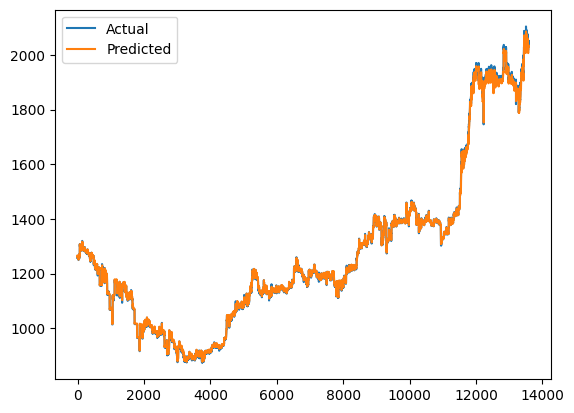

In [10]:
predicted = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted)
actual_prices = scaler.inverse_transform(y_test)

# Plot
plt.plot(actual_prices, label='Actual')
plt.plot(predicted_prices, label='Predicted')
plt.legend()
plt.show()


In [11]:
from sklearn.metrics import mean_squared_error

rmse = np.sqrt(mean_squared_error(actual_prices, predicted_prices))
print(f'RMSE: {rmse:.2f}')


RMSE: 7.09


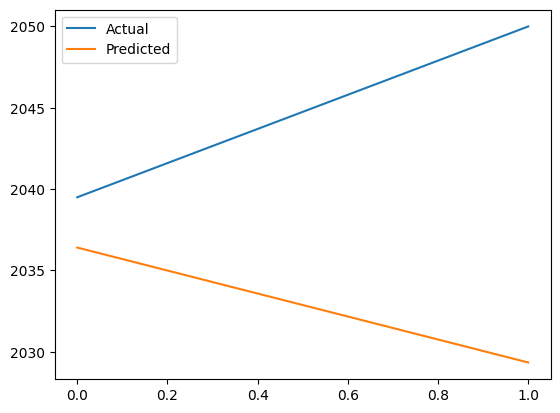

In [14]:
# Only plot last 500 actual and predicted prices
plt.plot(actual_prices[-2:], label='Actual')
plt.plot(predicted_prices[-2:], label='Predicted')
plt.legend()
plt.show()


In [15]:
predicted_prices[-2:]

array([[2036.4071],
       [2029.3411]], dtype=float32)

In [16]:
actual_prices[-2:]

array([[2039.5],
       [2050. ]])